In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential,save_model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [2]:
data = pd.read_csv("training.csv")
data.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [3]:
emotion_dict = {0: 'sadness', 1: 'happy', 2: 'love', 3: 'anger', 4: 'fear',5: 'suprise'}
data['emotion'] = data['label'].map(emotion_dict)

In [4]:
data.head()

,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [5]:
data['emotion'].unique()

array(['sadness', 'anger', 'love', 'suprise', 'fear', 'happy'],
      dtype=object)

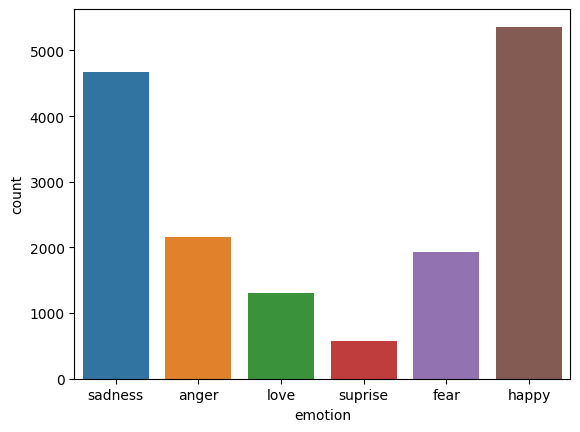

In [6]:
sns.countplot(data,x=data.emotion);

In [7]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data.text)
sequences = tokenizer.texts_to_sequences(data.text)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences)
sequences[3]

[1, 23, 164, 7, 664, 26, 5, 4157, 1, 58, 46, 8, 12, 21, 71, 29, 5, 3496]

In [8]:
padded_sequences[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    1,   23,  164,    7,  664,   26,    5,
       4157,    1,   58,   46,    8,   12,   21,   71,   29,    5, 3496])

In [9]:
rnn = Sequential([Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = padded_sequences.shape[1] , input_length = padded_sequences.shape[1]),
                  LSTM(50 , activation = 'softmax'),
                  Dense(50 , activation = 'softmax'),
                  Dense(len(data['emotion'].unique()) , activation = 'softmax')])

In [10]:
rnn.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [11]:
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 66)            1004058   
                                                                 
 lstm (LSTM)                 (None, 50)                23400     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 6)                 306       
                                                                 
Total params: 1030314 (3.93 MB)
Trainable params: 1030314 (3.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
listed_label = list(data['label'])
label = to_categorical(listed_label)

In [19]:
rnn.fit(padded_sequences,label,epochs=10)

Epoch 1/10
 26/500 [>.............................] - ETA: 32s - loss: 0.7472 - accuracy: 0.5757

In [14]:
user_input = input("Enter Sentence:")
sequences = tokenizer.texts_to_sequences([user_input])
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=66)

In [15]:
padded

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,   23,   71,  423,   32,   22, 3411]])

In [16]:
emotions = ['sadness','happy','love','anger','fear','suprise']
prediction = np.argmax(rnn.predict(padded))
emotions[prediction]

1/1 [==============================] - 0s 449ms/step


'anger'

In [17]:
rnn.save('model.h5')

c:\Users\T Ashok Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
